<a href="https://colab.research.google.com/github/PedroTricossi/Analise-de-dados/blob/master/MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
def plotDigit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
  plt.axis("off")

In [0]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

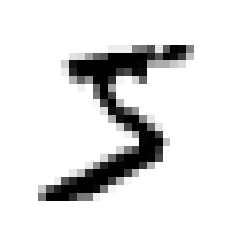

In [7]:
someDigit = X[0]
plotDigit(someDigit)

In [8]:
y[0]

'5'

In [0]:
y = y.astype(np.uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [0]:
X_trainGit = X_train[:5000]
y_trainGit = y_train[:5000]

In [22]:
from sklearn.linear_model import SGDClassifier
sgdClf = SGDClassifier()
sgdClf.fit(X_trainGit, y_trainGit)
sgdClf.predict([someDigit])

array([5], dtype=uint8)

In [23]:
someDigitScoreSGD = sgdClf.decision_function([someDigit])
someDigitScoreSGD

array([[-954746.91392949, -837358.78249364, -341156.08796533,
         -79397.77781461, -739006.6401095 ,   18019.54538648,
        -894928.35900733, -747077.80199886, -346666.70530436,
        -717221.27928652]])

In [24]:
from sklearn.svm import SVC

svmClf = SVC(gamma="auto", random_state=42)
svmClf.fit(X_trainGit, y_trainGit)
svmClf.predict([someDigit])

array([5], dtype=uint8)

In [25]:
someDigitScoreSVM = svmClf.decision_function([someDigit])
someDigitScoreSVM

array([[ 0.80692283,  8.03544974,  1.81806847,  2.8249906 ,  5.91497318,
         9.29514788,  4.83731058,  6.97237517, -0.21039558,  3.82792163]])

In [26]:
svmClf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
from sklearn.multiclass import OneVsRestClassifier
ovrClf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovrClf.fit(X_trainGit, y_trainGit)
ovrClf.predict([someDigit])

array([5], dtype=uint8)

In [28]:
someDigitScoreOVR = ovrClf.decision_function([someDigit])
someDigitScoreOVR

array([[-0.99951874, -0.99908903, -0.99926585, -0.9999896 , -0.9993198 ,
         0.09505037, -0.99997005, -0.99945137, -0.99975554, -0.99949709]])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_trainGit.astype(np.float64))

In [0]:
from sklearn.model_selection import  cross_val_score
crossSGD = cross_val_score(sgdClf, X_trainScaled, y_trainGit, cv=3, scoring="accuracy")